# Post processing test

In [64]:
import os
import joblib
import pandas as pd
import shap

In [21]:
d = os.getcwd()
model = joblib.load(d+"\\data\\model.pkl")
X_test = pd.read_csv(d+"\\data\\X_test.csv")
y_test = pd.read_csv(d+"\\data\\y_test.csv")

In [23]:
explainer = shap.TreeExplainer(model)
X_shap = X_test.copy()
shap_values = explainer.shap_values(X_shap)[1]

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [32]:
x_unit = X_test.iloc[4720,:].copy()
x_unit

product_id                         1004767.00
brand                                  543.00
price                                  254.76
event_hour                               4.00
event_minute                            41.00
event_weekday                            1.00
view_session                             1.00
view_product_session                     1.00
duration                               209.00
number_of_previous_sess                  1.00
number_of_previous_sess_product          0.00
category                                 7.00
sub_category                            29.00
Name: 4720, dtype: float64

In [37]:
print("Pos : {:2.3f}%".format(model.predict_proba([x_unit])[0, 1] * 100))

Pos : 93.213%


In [41]:
x_unit = X_test.loc[4720, :].copy()
x_unit['price'] += 1
print("Pos : {:2.3f}%".format(model.predict_proba([x_unit])[0, 1] * 100))

x_unit = X_test.loc[4720, :].copy()
x_unit['price'] -= 1
print("Pos : {:2.3f}%".format(model.predict_proba([x_unit])[0, 1] * 100))

Pos : 93.213%
Pos : 92.289%


In [43]:
import numpy as np

# On ne sélectionne que les articles dont le prix est > à 1€, sinon on aurait un prix ... négatif !
X_test_price = X_test[X_test['price'] > 1]
X_test_price_plus = X_test_price.copy()
X_test_price_plus['price'] += 1
X_test_price_minus = X_test_price.copy()
X_test_price_minus['price'] -= 1

y_price = pd.DataFrame()
y_price["y"] = model.predict_proba(X_test_price)[:, 1]
y_price["y+"] = model.predict_proba(X_test_price_plus)[:, 1]
y_price["y-"] = model.predict_proba(X_test_price_minus)[:, 1]
y_price["abs_delta"] = np.abs(y_price["y-"] - y_price["y+"])
y_price.sort_values("abs_delta", ascending=False).head(n=10)

,y,y+,y-,abs_delta
4742,0.526184,0.427874,0.610128,0.182254
2612,0.634502,0.601127,0.774726,0.173599
1807,0.401953,0.401953,0.571084,0.169131
5336,0.350438,0.318965,0.476387,0.157422
526,0.558763,0.416428,0.558763,0.142335
2330,0.553874,0.411623,0.553874,0.142251
3324,0.780164,0.689617,0.827998,0.138381
1674,0.651435,0.558759,0.696286,0.137527
3650,0.800732,0.715567,0.844979,0.129412
2580,0.470453,0.592397,0.470453,0.121944


In [44]:
y_price = y_price.sort_values("abs_delta", ascending=False)

In [48]:
idx = y_price.head(100).index

In [49]:
X_test.iloc[idx]

,product_id,brand,price,event_hour,event_minute,event_weekday,view_session,view_product_session,duration,number_of_previous_sess,number_of_previous_sess_product,category,sub_category
4742,1004856,543,132.87,17,28,1,1,1,51,1,0,7,29
2612,12701231,548,41.96,15,22,1,22,3,2073,0,0,11,41
1807,12706780,442,41.44,6,18,1,1,1,38,0,0,11,41
5336,12705001,131,41.96,12,3,1,4,2,109,0,0,11,41
526,12702944,131,40.93,3,39,1,17,2,706,0,0,11,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4202,12710449,623,41.96,4,9,1,10,10,345,0,0,11,41
2265,1005098,543,154.27,16,8,1,2,2,69,4,3,7,29
4924,12709709,131,38.35,7,36,1,9,4,1255,0,0,11,41
177,5701043,480,154.19,18,32,1,26,4,961,0,0,3,0


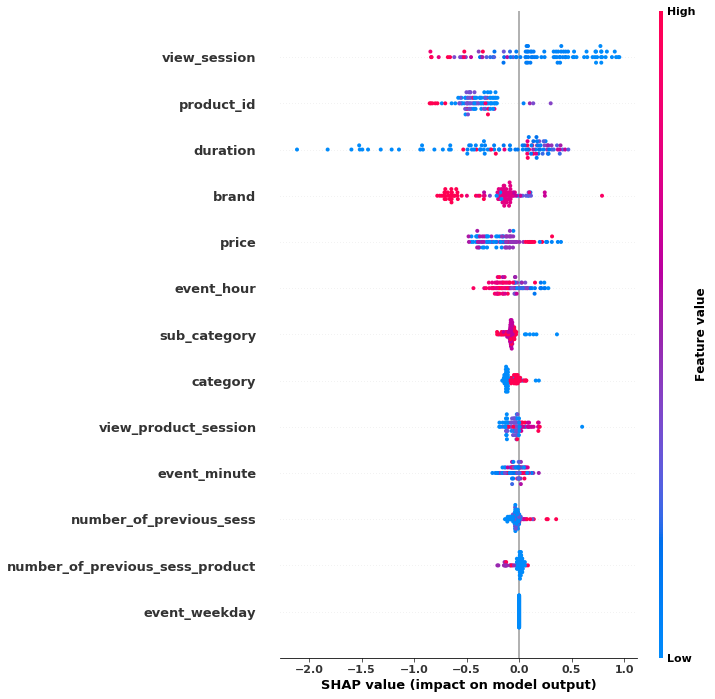

In [51]:
shap.summary_plot(shap_values[idx, :], X_shap.loc[idx, :], plot_size=0.8)

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


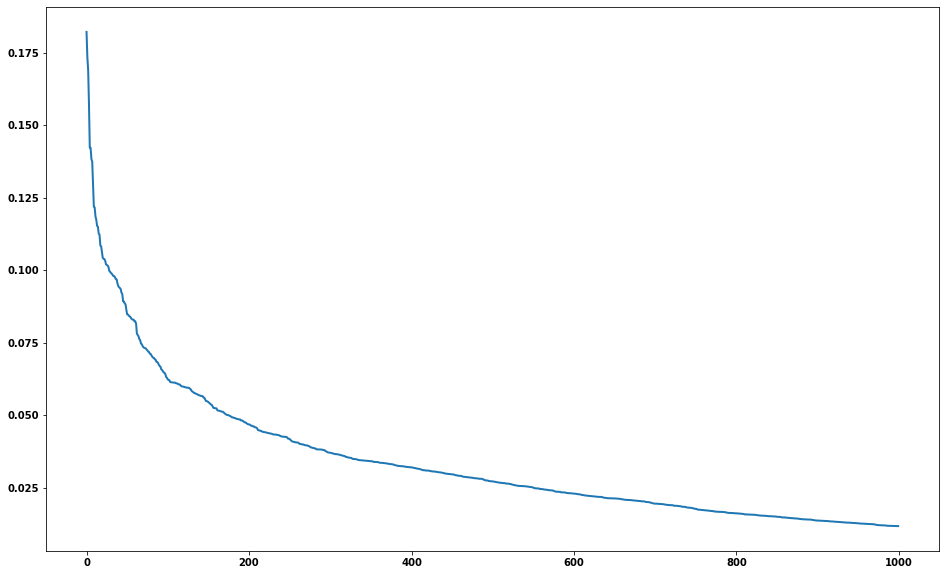

In [52]:
import matplotlib.pyplot as plt

n_obs = 1000

plt.figure(figsize=(16,10))
plt.plot(
    range(n_obs),
    y_price.sort_values("abs_delta", ascending=False).iloc[:n_obs, -1],
    lw=2
)

In [53]:
x_unit = X_test.loc[375, :]

model.predict_proba([x_unit])

array([[0.90462398, 0.09537602]])

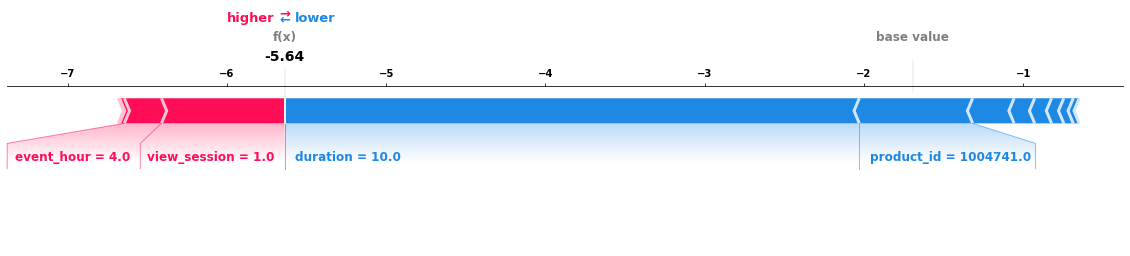

In [54]:
shap.force_plot(explainer.expected_value[0], shap_values[375, :], x_unit, matplotlib=True)

In [55]:
x_unit = X_test.iloc[375, :].copy()
x_unit['duration'] += 60

model.predict_proba([x_unit])

array([[0.24608638, 0.75391362]])

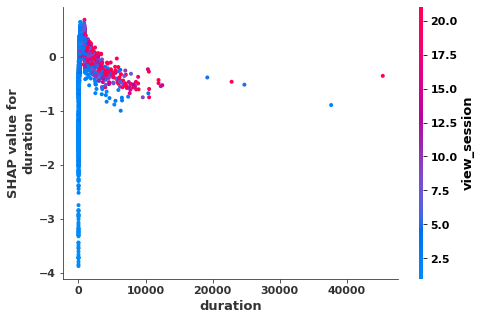

In [56]:
shap.dependence_plot("duration", shap_values, X_shap)

In [58]:
shap_values

array([[-0.30892282, -0.0455095 , -0.05534556, ...,  0.01271457,
        -0.1400051 , -0.09021649],
       [-0.21679955, -0.09284234,  0.03720569, ..., -0.11769872,
         0.28795964,  0.00580385],
       [-0.3557431 ,  0.37435541,  0.0105212 , ...,  0.02911485,
         0.17317875, -0.12509005],
       ...,
       [-0.44315754, -0.36430291, -0.05013787, ..., -0.07950863,
        -0.13238944, -0.10084696],
       [-0.30802444, -0.11423667, -0.06947957, ..., -0.16628874,
        -0.10560505, -0.07803826],
       [-0.4510653 , -0.57889684, -0.23922049, ..., -0.04142108,
        -0.02890085, -0.04083633]])

In [63]:
x_unit = X_test.iloc[375, :].copy()
x_unit['duration'] += 10
x_unit['view_session'] += 10

model.predict_proba([x_unit])

array([[0.91268695, 0.08731305]])

In [61]:
x_unit

product_id                         1004741.00
brand                                  667.00
price                                  185.71
event_hour                               4.00
event_minute                            50.00
event_weekday                            1.00
view_session                             1.00
view_product_session                     1.00
duration                                20.00
number_of_previous_sess                  0.00
number_of_previous_sess_product          0.00
category                                 7.00
sub_category                            29.00
Name: 375, dtype: float64